<a href="https://colab.research.google.com/github/EliasSf73/Autism-Classification/blob/master/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader


# Datasest and DataLoader

In [2]:
transform=transforms.ToTensor()
mnist_dataset=datasets.MNIST(root='./data',train=True, download=True, transform=transform)
data_loader=DataLoader(dataset=mnist_dataset,batch_size=64,shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 138198288.28it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 41713393.19it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 44237639.66it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 5622942.38it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



visualize

In [3]:
dataiter = iter(data_loader.__iter__())
images, labels = next(dataiter)
print(torch.min(images),torch.max(images))

tensor(0.) tensor(1.)


# model

In [4]:
class AutoEncoder(nn.Module): # size Reduction(compression)
  def __init__(self):
    super().__init__()
    self.encoder= nn.Sequential(nn.Linear(28*28,128),# N (batch_size),784 size -> N,128
                                nn.ReLU(),
                                nn.Linear(128,64), # N,128 -> N,64
                                nn.ReLU(),
                                nn.Linear(64,12), # N,64 -> N,12
                                nn.ReLU(),
                                nn.Linear(12,3) # N,12 -> N,3
                                )
    self.decoder=nn.Sequential(nn.Linear(3,12),# N (batch_size),3 -> N,12
                                nn.ReLU(),
                                nn.Linear(12,64), # N,12 -> N,64
                                nn.ReLU(),
                                nn.Linear(64,128), # N,64 -> N,128
                                nn.ReLU(),
                                nn.Linear(128,28*28), # N,128 -> N,784
                                nn.Sigmoid(), # to make image values between 0 and 1 as seen above
                                )





  def forward(self,x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)

    return decoded




In [5]:
model=AutoEncoder()
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=1e-3,weight_decay=1e-5)


# Training

In [6]:
epochs=10
outputs=[]
for epoch in range(epochs):
  current_loss=0.0
  for img,_ in data_loader:
    #flatten image before feeding to linear layer
    img=img.reshape(-1,28*28)
    # reconstruction
    reconst=model(img)
    # calculate mean squared error loss
    loss=criterion(reconst,img)
    #minimize loss with backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    current_loss+=loss.item()

  epoch_loss = current_loss / len(data_loader)
  print(f'epoch: {epoch+1}, Loss: {epoch_loss:.4f}')
  outputs.append((epoch, img,reconst))  # Append the average loss for the epoch

epoch: 1, Loss: 0.0614
epoch: 2, Loss: 0.0456
epoch: 3, Loss: 0.0421
epoch: 4, Loss: 0.0404
epoch: 5, Loss: 0.0392
epoch: 6, Loss: 0.0383
epoch: 7, Loss: 0.0376
epoch: 8, Loss: 0.0371
epoch: 9, Loss: 0.0366
epoch: 10, Loss: 0.0362


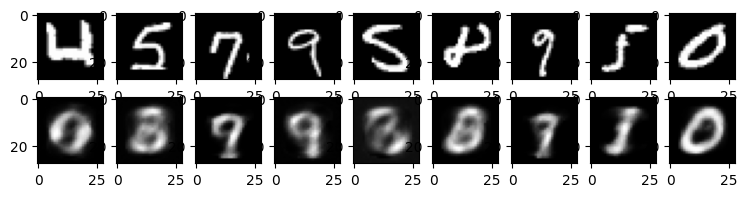

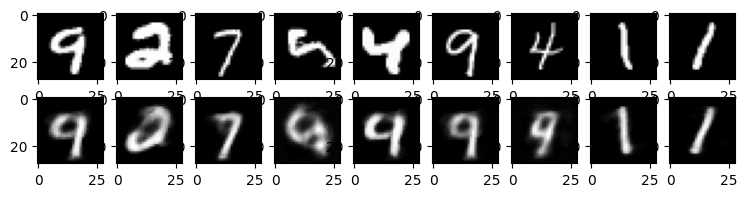

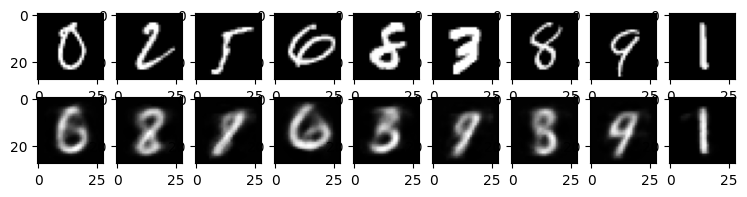

In [7]:
# Loop over a range of epochs to visualize the outputs
for k in range(0, epochs, 4):
    # Set up a figure with a specific size to plot images
    plt.figure(figsize=(9, 2))
    # Use grayscale color map for the images
    plt.gray()

    # Extract the images for the k-th epoch from the outputs list
    # and convert tensor data to numpy arrays
    imgs = outputs[k][1].detach().numpy()
    # Extract the reconstructed images for the k-th epoch from the outputs list
    # and convert tensor data to numpy arrays
    recon = outputs[k][2].detach().numpy()

    # Loop over the images and enumerate to get both index and image
    for i, item in enumerate(imgs):
        # Break the loop if we have already plotted 9 images
        if i >= 9: break
        # Set the subplot configuration for original images
        plt.subplot(2, 9, i+1)
        # Reshape the image to a 2D array (28x28)
        item = item.reshape(-1, 28, 28)
        # Display the image on the subplot
        plt.imshow(item[0])

    # Loop over the reconstructed images and enumerate to get both index and image
    for i, item in enumerate(recon):
        # Break the loop if we have already plotted 9 reconstructed images
        if i >= 9: break
        # Set the subplot configuration for reconstructed images
        plt.subplot(2, 9, 9+i+1)  # Offset by 9 for the second row
        # Reshape the reconstructed image to a 2D array (28x28)
        item = item.reshape(-1, 28, 28)
        # Display the reconstructed image on the subplot
        plt.imshow(item[0])

# Note: In the actual code, you should also include plt.show() at the end
# to display the figure if it's not automatically shown in your environment.
